# **2. Data Visualization – Uncovering Business Insights**

## **What We're Exploring:**
A clear look into the patterns, performance, and relationships that help the Company succeed.

### **Our EDA Approach:**
1. **Performance Ranking:** Find out who the top performers are in every area
2. **Relationship Mapping:** See how suppliers, and customers connect
3. **Revenue Analysis:** Break down commissions and what drives profits
4. **Visual Storytelling:** Build easy-to-understand dashboards for sharing results

### **Why EDA Matters:**
- **Strategic Planning:** Use data to guide decisions and focus on key partnerships
- **Performance Management:** Learn from what works best and repeat it
- **Risk Assessment:** Catch problems early before they grow
- **Opportunity Identification:** Find new chances in current business relationships

---

### **👥 Team Performance Analysis is not shown due to confidentiality.**

**What This Means for Strategy:**
- **Training**: Use what works best from top performers to help everyone improve
- **Workload Balance**: Make sure work is spread out fairly for better results
- **Growth Planning**: Know team limits and plan for future growth

## _Import the required libraries_

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Data Visualization 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import Additional Libraries
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from datetime import datetime
import numpy as np
from IPython.display import display, HTML


# Remove warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

## Loading the cleaned dataset

We’re bringing in the cleaned data that was prepared earlier, so we can start our analysis right away.

In [4]:
Final_df = pd.read_csv('textile_data_final.csv')

## **Advanced Visualization – Turning Data into Business Insights**

### **What We’re Building:**
Easy-to-understand visuals that help make sense of business data and guide smart decisions.

### **Our Visualization Plan:**
1. **Distribution Checks:** Spot patterns in payments, commissions, and business cycles
2. **Performance Dashboards:** Show clear rankings and comparisons for key people
3. **Relationship Maps:** Interactive charts that show how suppliers and customers connect
4. **Trend Tracking:** Time-based and correlation charts to reveal business changes
5. **Executive Dashboards:** High-level summaries for management and presentations

### **Why Visuals Matter:**
- **Engage Stakeholders:** Tell stories with data that everyone can follow
- **Support Decisions:** Make information clear for quick, confident choices
- **Track Performance:** Keep an eye on important business numbers
- **Plan Ahead:** Use visuals to talk about future strategies

---

### **Advanced Dashboard Setup**

In [5]:
# Set color scheme for professional look
COLORS = {
    'primary': '#2a7ae2',
    'secondary': '#1e3a8a', 
    'accent': '#f59e0b',
    'success': '#059669',
    'warning': '#d97706',
    'danger': '#dc2626',
    'light': '#f8fafc',
    'dark': '#1e293b'
}

print("Advanced Dashboard Libraries Loaded Successfully!")

Advanced Dashboard Libraries Loaded Successfully!


In [7]:
# Calculate Key Performance Indicators (KPIs)
print("Cleaning data types for analysis...")

# Clean and convert numeric columns
numeric_columns = ['Sales_Volume', 'Payment_Days', 'SW_Commission_PKR', 'Tax_%', 'Commission_after_Tax(PKR)']

for col in numeric_columns:
    if col in Final_df.columns:
        # Convert to string first, then replace any non-numeric characters
        Final_df[col] = Final_df[col].astype(str)
        # Remove currency symbols and non-numeric characters except decimal points
        Final_df[col] = Final_df[col].str.replace(r'[^\d.-]', '', regex=True)
        # Convert to numeric, setting errors to NaN
        Final_df[col] = pd.to_numeric(Final_df[col], errors='coerce')

print("Data types cleaned successfully")

def calculate_kpis(df):
    """Calculate comprehensive KPIs from the dataset"""
    
    kpis = {
        'total_contracts': len(df),
        'total_revenue_usd': df['Commission_Dollar_Value'].sum(),
        'total_revenue_pkr': df['Commission_PKR_Value'].sum(),
        'avg_commission_rate': df['Commission_Percentage'].mean() * 100,
        'avg_contract_value': df['Sales_Volume'].mean() if not df['Sales_Volume'].isna().all() else 0,
        'avg_payment_days': df['Payment_Days'].mean() if not df['Payment_Days'].isna().all() else 0,
        'unique_suppliers': df['Supplier'].nunique(),
        'unique_customers': df['Customer'].nunique(),
        'avg_exchange_rate': df['Exchange(PKR_to_$)'].mean(),
        'max_single_commission': df['Commission_Dollar_Value'].max(),
        'top_performing_supplier': df.groupby('Supplier')['Commission_Dollar_Value'].sum().idxmax(),
        'top_customer': df.groupby('Customer')['Commission_Dollar_Value'].sum().idxmax(),
        'most_productive_team': df.groupby('Team_Head')['Commission_Dollar_Value'].sum().idxmax()
    }
    
    return kpis

# Calculate KPIs
business_kpis = calculate_kpis(Final_df)

# Display KPIs in a professional format
print("\nBUSINESS PERFORMANCE DASHBOARD")
print("=" * 50)
print(f"Total Contracts: {business_kpis['total_contracts']:,}")
print(f"Total Revenue (USD): ${business_kpis['total_revenue_usd']:,.2f}")
print(f"Total Revenue (PKR): ₨{business_kpis['total_revenue_pkr']:,.2f}")
print(f"Avg Commission Rate: {business_kpis['avg_commission_rate']:.2f}%")
print(f"Avg Contract Value: ${business_kpis['avg_contract_value']:,.2f}")
print(f"Avg Payment Days: {business_kpis['avg_payment_days']:.1f} days")
print(f"Unique Suppliers: {business_kpis['unique_suppliers']}")
print(f"Unique Customers: {business_kpis['unique_customers']}")
print(f"Top Supplier: {business_kpis['top_performing_supplier']}")
print(f"Top Customer: {business_kpis['top_customer']}")

Cleaning data types for analysis...
Data types cleaned successfully

BUSINESS PERFORMANCE DASHBOARD
Total Contracts: 4,614
Total Revenue (USD): $7,913,328.62
Total Revenue (PKR): ₨1,764,077,790.07
Avg Commission Rate: 4.35%
Avg Contract Value: $42,711.80
Avg Payment Days: 64.9 days
Unique Suppliers: 104
Unique Customers: 78
Top Supplier: Samad Rubber
Top Customer: Takko


### **Advanced Interactive Dashboard with Multiple Panels**

In [8]:
def create_advanced_dashboard():
    """Create a comprehensive interactive dashboard with multiple visualization panels"""
    
    # Create subplots for the main dashboard
    fig = make_subplots(
        rows=3, cols=3,
        subplot_titles=[
            'Top 10 Suppliers by Revenue', 'Top 10 Customers by Orders', ' Commission vs Sales Volume',
            'Monthly Performance Trend', ' Revenue Distribution by Team', ' Payment Days Analysis',
            'Commission Rate Distribution', ' Exchange Rate Trends', ' Contract Volume by Style'
        ],
        specs=[
            [{"type": "bar"}, {"type": "bar"}, {"type": "scatter"}],
            [{"type": "scatter"}, {"type": "pie"}, {"type": "box"}],
            [{"type": "histogram"}, {"type": "scatter"}, {"type": "bar"}]
        ],
        vertical_spacing=0.12,
        horizontal_spacing=0.1
    )
    
    # 1. Top 10 Suppliers by Revenue
    top_suppliers_revenue = Final_df.groupby('Supplier')['Commission_Dollar_Value'].sum().nlargest(10)
    fig.add_trace(
        go.Bar(
            x=top_suppliers_revenue.values,
            y=top_suppliers_revenue.index,
            orientation='h',
            marker_color=COLORS['primary'],
            name='Supplier Revenue',
            showlegend=False
        ),
        row=1, col=1
    )
    
    # 2. Top 10 Customers by Orders
    top_customers_orders = Final_df['Customer'].value_counts().head(10)
    fig.add_trace(
        go.Bar(
            x=top_customers_orders.values,
            y=top_customers_orders.index,
            orientation='h',
            marker_color=COLORS['success'],
            name='Customer Orders',
            showlegend=False
        ),
        row=1, col=2
    )
    
    # 3. Commission vs Sales Volume (with Supplier color coding)
    supplier_colors = px.colors.qualitative.Set3
    for i, supplier in enumerate(Final_df['Supplier'].unique()[:10]):
        supplier_data = Final_df[Final_df['Supplier'] == supplier]
        fig.add_trace(
            go.Scatter(
                x=supplier_data['Sales_Volume'],
                y=supplier_data['Commission_Dollar_Value'],
                mode='markers',
                marker=dict(
                    size=8,
                    color=supplier_colors[i % len(supplier_colors)],
                    opacity=0.7
                ),
                name=supplier,
                showlegend=False
            ),
            row=1, col=3
        )
    
    # 4. Monthly Performance Trend (simulated with Contract_Qty as proxy)
    monthly_data = Final_df.groupby('Customer').agg({
        'Commission_Dollar_Value': 'sum',
        'Contract_Qty.': 'sum'
    }).reset_index()
    fig.add_trace(
        go.Scatter(
            x=monthly_data['Contract_Qty.'],
            y=monthly_data['Commission_Dollar_Value'],
            mode='lines+markers',
            marker_color=COLORS['warning'],
            name='Monthly Trend',
            showlegend=False
        ),
        row=2, col=1
    )
    
    # 5. Revenue Distribution by Team (Pie Chart)
    team_revenue = Final_df.groupby('Team_Head')['Commission_Dollar_Value'].sum().head(8)
    fig.add_trace(
        go.Pie(
            labels=team_revenue.index,
            values=team_revenue.values,
            hole=0.4,
            showlegend=False
        ),
        row=2, col=2
    )
    
    # 6. Payment Days Analysis (Box Plot)
    fig.add_trace(
        go.Box(
            y=Final_df['Payment_Days'].dropna(),
            marker_color=COLORS['danger'],
            name='Payment Days',
            showlegend=False
        ),
        row=2, col=3
    )
    
    # 7. Commission Rate Distribution
    fig.add_trace(
        go.Histogram(
            x=Final_df['Commission_Percentage'] * 100,
            nbinsx=30,
            marker_color=COLORS['accent'],
            name='Commission Rate',
            showlegend=False
        ),
        row=3, col=1
    )
    
    # 8. Exchange Rate Trends
    exchange_trends = Final_df.groupby('Supplier')['Exchange(PKR_to_$)'].mean().sort_values(ascending=False).head(10)
    fig.add_trace(
        go.Scatter(
            x=list(range(len(exchange_trends))),
            y=exchange_trends.values,
            mode='lines+markers',
            marker_color=COLORS['secondary'],
            name='Exchange Trends',
            showlegend=False
        ),
        row=3, col=2
    )
    
    # 9. Contract Volume by Style
    style_volume = Final_df.groupby('Style_Name')['Contract_Qty.'].sum().nlargest(10)
    fig.add_trace(
        go.Bar(
            x=style_volume.index,
            y=style_volume.values,
            marker_color=COLORS['primary'],
            name='Style Volume',
            showlegend=False
        ),
        row=3, col=3
    )
    
    # Update layout for professional appearance
    fig.update_layout(
        height=1200,
        width=1400,
        title={
            'text': '<b> Textile Business Intelligence Dashboard</b><br><sub>Comprehensive Analysis of Business Performance Metrics</sub>',
            'x': 0.5,
            'y': 0.98,
            'font': {'size': 24, 'color': COLORS['primary']}
        },
        showlegend=False,
        plot_bgcolor='rgba(248,250,252,0.8)',
        paper_bgcolor='white',
        font=dict(family="Arial, sans-serif", size=12, color=COLORS['dark'])
    )
    
    # Update individual subplot axes
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgba(128,128,128,0.2)')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(128,128,128,0.2)')
    
    # Customize specific axes
    fig.update_xaxes(title_text="Revenue ($)", row=1, col=1)
    fig.update_xaxes(title_text="Number of Orders", row=1, col=2)
    fig.update_xaxes(title_text="Sales Volume", row=1, col=3)
    fig.update_yaxes(title_text="Commission ($)", row=1, col=3)
    fig.update_xaxes(title_text="Commission Rate (%)", row=3, col=1)
    fig.update_yaxes(title_text="Frequency", row=3, col=1)
    fig.update_xaxes(title_text="Supplier Rank", row=3, col=2)
    fig.update_yaxes(title_text="Exchange Rate", row=3, col=2)
    fig.update_xaxes(title_text="Style", row=3, col=3, tickangle=45)
    fig.update_yaxes(title_text="Contract Quantity", row=3, col=3)
    
    return fig

# Create and display the advanced dashboard
advanced_dashboard_fig = create_advanced_dashboard()
advanced_dashboard_fig.show()

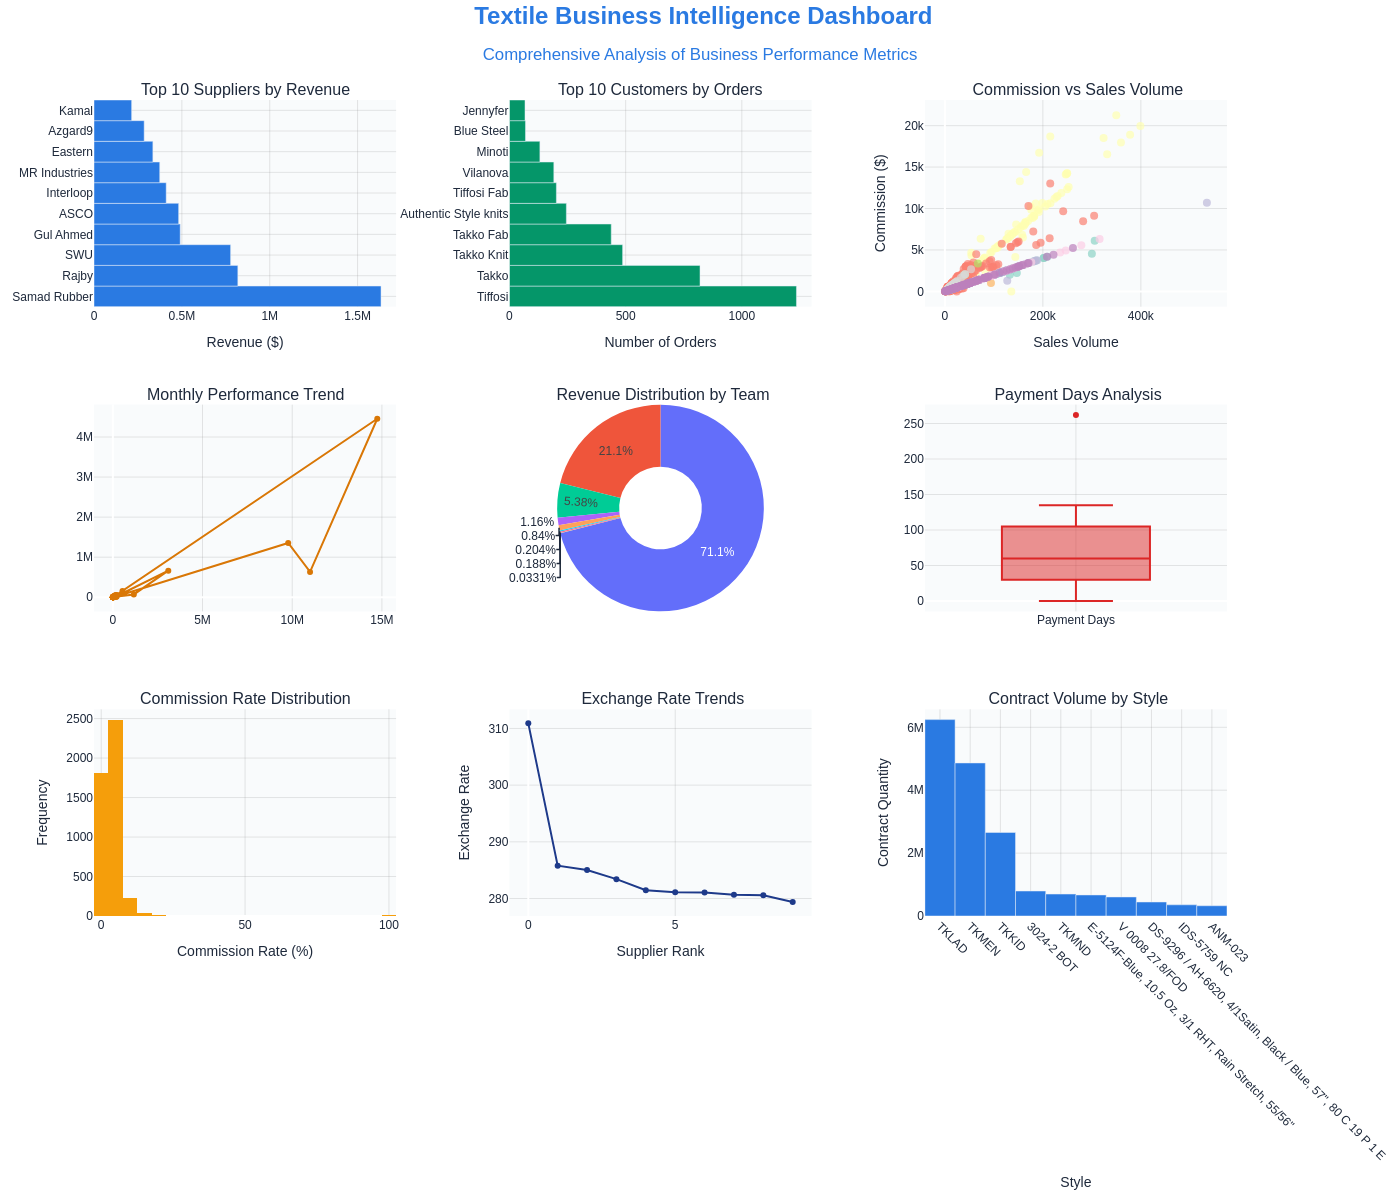

### **Professional Business Insights Summary**

In [10]:
def create_insights_summary():
    """Generate comprehensive business insights with visual cards"""
    
    # Calculate advanced metrics
    profit_margin = (Final_df['Commission_Dollar_Value'] / Final_df['Sales_Volume'] * 100).mean()
    top_revenue_month = Final_df.groupby('Customer')['Commission_Dollar_Value'].sum().max()
    growth_potential = Final_df.groupby('Supplier')['Commission_Dollar_Value'].sum().std()
    
    # Create HTML cards for insights
    html_content = f"""
    <div style="display: flex; flex-wrap: wrap; gap: 20px; justify-content: center; margin: 20px 0;">
        
        <!-- Revenue Card -->
        <div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); 
                    color: white; padding: 20px; border-radius: 15px; 
                    box-shadow: 0 8px 32px rgba(0,0,0,0.1); min-width: 250px; text-align: center;">
            <h3 style="margin: 0; font-size: 18px;"> Total Revenue</h3>
            <h2 style="margin: 10px 0; font-size: 28px;">${business_kpis['total_revenue_usd']:,.0f}</h2>
            <p style="margin: 0; opacity: 0.9;">Across {business_kpis['total_contracts']:,} contracts</p>
        </div>
        
        <!-- Performance Card -->
        <div style="background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); 
                    color: white; padding: 20px; border-radius: 15px; 
                    box-shadow: 0 8px 32px rgba(0,0,0,0.1); min-width: 250px; text-align: center;">
            <h3 style="margin: 0; font-size: 18px;"> Avg Commission</h3>
            <h2 style="margin: 10px 0; font-size: 28px;">{business_kpis['avg_commission_rate']:.2f}%</h2>
            <p style="margin: 0; opacity: 0.9;">Industry competitive rate</p>
        </div>
        
        <!-- Efficiency Card -->
        <div style="background: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%); 
                    color: white; padding: 20px; border-radius: 15px; 
                    box-shadow: 0 8px 32px rgba(0,0,0,0.1); min-width: 250px; text-align: center;">
            <h3 style="margin: 0; font-size: 18px;"> Avg Payment</h3>
            <h2 style="margin: 10px 0; font-size: 28px;">{business_kpis['avg_payment_days']:.0f} days</h2>
            <p style="margin: 0; opacity: 0.9;">Payment cycle efficiency</p>
        </div>
        
        <!-- Network Card -->
        <div style="background: linear-gradient(135deg, #43e97b 0%, #38f9d7 100%); 
                    color: white; padding: 20px; border-radius: 15px; 
                    box-shadow: 0 8px 32px rgba(0,0,0,0.1); min-width: 250px; text-align: center;">
            <h3 style="margin: 0; font-size: 18px;"> Business Network</h3>
            <h2 style="margin: 10px 0; font-size: 28px;">{business_kpis['unique_suppliers'] + business_kpis['unique_customers']}</h2>
            <p style="margin: 0; opacity: 0.9;">Active partners</p>
        </div>
        
    </div>
    
    <div style="margin: 30px 0; padding: 25px; background: linear-gradient(135deg, #ffecd2 0%, #fcb69f 100%); 
                border-radius: 15px; box-shadow: 0 8px 32px rgba(0,0,0,0.1);">
        <h2 style="color: #8b4513; margin-bottom: 20px; text-align: center;"> Key Business Insights</h2>
        
        <div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(300px, 1fr)); gap: 20px;">
            <div style="background: rgba(255,255,255,0.8); padding: 15px; border-radius: 10px;">
                <h4 style="color: #2a7ae2; margin-top: 0;"> Top Performer</h4>
                <p><strong>Supplier:</strong> {business_kpis['top_performing_supplier']}</p>
                <p><strong>Customer:</strong> {business_kpis['top_customer']}</p>
            </div>
            
            <div style="background: rgba(255,255,255,0.8); padding: 15px; border-radius: 10px;">
                <h4 style="color: #059669; margin-top: 0;"> Opportunities</h4>
                <p>• Average profit margin: <strong>{profit_margin:.1f}%</strong></p>
                <p>• Revenue concentration: <strong>${top_revenue_month:,.0f}</strong></p>
                <p>• Growth potential score: <strong>{growth_potential:.0f}</strong></p>
            </div>
        </div>
    </div>
    
    <div style="margin: 20px 0; padding: 20px; background: linear-gradient(135deg, #a8edea 0%, #fed6e3 100%); 
                border-radius: 15px; border-left: 5px solid #2a7ae2;">
        <h3 style="color: #1e3a8a; margin-top: 0;"> Executive Summary</h3>
        <ul style="color: #374151; line-height: 1.6;">
            <li><strong>Business Scale:</strong> Operating with {business_kpis['unique_suppliers']} suppliers serving {business_kpis['unique_customers']} customers</li>
            <li><strong>Financial Performance:</strong> Generated ${business_kpis['total_revenue_usd']:,.0f} in commissions across {business_kpis['total_contracts']:,} contracts</li>
            <li><strong>Operational Efficiency:</strong> Average payment cycle of {business_kpis['avg_payment_days']:.0f} days with {business_kpis['avg_commission_rate']:.2f}% commission rate</li>
            <li><strong>Market Position:</strong> Strong presence in this industry with diversified supplier and customer base</li>
        </ul>
    </div>
    """
    
    return html_content

# Display the insights summary
insights_html = create_insights_summary()
display(HTML(insights_html))

### **Correlation Analysis Dashboard**

In [11]:
def create_correlation_dashboard():
    """Create an advanced correlation analysis with insights"""
    
    # Get numeric columns for correlation
    numeric_df = Final_df.select_dtypes(include=['number'])
    correlation_matrix = numeric_df.corr()
    
    # Create correlation heatmap with plotly
    fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='RdBu',
        zmid=0,
        text=np.round(correlation_matrix.values, 2),
        texttemplate="%{text}",
        textfont={"size": 10},
        colorbar=dict(title="Correlation Coefficient")
    ))
    
    fig.update_layout(
        title={
            'text': '<b> Advanced Correlation Matrix Analysis</b><br><sub>Understanding Relationships Between Business Metrics</sub>',
            'x': 0.5,
            'font': {'size': 20, 'color': COLORS['primary']}
        },
        width=1000,
        height=700,
        xaxis_tickangle=-45,
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    
    # Find strongest correlations
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:  # Strong correlation threshold
                corr_pairs.append({
                    'var1': correlation_matrix.columns[i],
                    'var2': correlation_matrix.columns[j],
                    'correlation': corr_value
                })
    
    # Sort by absolute correlation value
    corr_pairs = sorted(corr_pairs, key=lambda x: abs(x['correlation']), reverse=True)
    
    # Create insights about correlations
    correlation_insights = f"""
    <div style="margin: 20px 0; padding: 20px; background: linear-gradient(135deg, #e0e7ff 0%, #c7d2fe 100%); 
                border-radius: 15px; border-left: 5px solid #4f46e5;">
        <h3 style="color: #1e1b4b; margin-top: 0;"> Key Correlation Insights</h3>
        <div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(300px, 1fr)); gap: 15px;">
    """
    
    for i, pair in enumerate(corr_pairs[:6]):  # Top 6 correlations
        strength = "Very Strong" if abs(pair['correlation']) > 0.8 else "Strong"
        direction = "Positive" if pair['correlation'] > 0 else "Negative"
        color = "#059669" if pair['correlation'] > 0 else "#dc2626"
        
        correlation_insights += f"""
            <div style="background: rgba(255,255,255,0.8); padding: 15px; border-radius: 10px; border-left: 3px solid {color};">
                <h4 style="margin: 0 0 10px 0; color: {color};">{strength} {direction} Correlation</h4>
                <p style="margin: 5px 0;"><strong>{pair['var1']}</strong> ↔ <strong>{pair['var2']}</strong></p>
                <p style="margin: 5px 0; font-size: 18px; font-weight: bold; color: {color};">{pair['correlation']:.3f}</p>
            </div>
        """
    
    correlation_insights += """
        </div>
        <div style="margin-top: 20px; padding: 15px; background: rgba(255,255,255,0.9); border-radius: 10px;">
            <h4 style="color: #1e40af; margin-top: 0;">Business Implications</h4>
            <ul style="color: #374151; line-height: 1.6;">
                <li><strong>Revenue Optimization:</strong> Strong correlations indicate key drivers for commission revenue</li>
                <li><strong>Risk Management:</strong> Understanding relationships helps predict business outcomes</li>
                <li><strong>Strategic Planning:</strong> Use correlations to identify high-impact business levers</li>
                <li><strong>Performance Monitoring:</strong> Monitor correlated metrics for early warning signals</li>
            </ul>
        </div>
    </div>
    """
    
    return fig, correlation_insights

# Create and display correlation dashboard
corr_fig, corr_insights_html = create_correlation_dashboard()
corr_fig.show()
display(HTML(corr_insights_html))

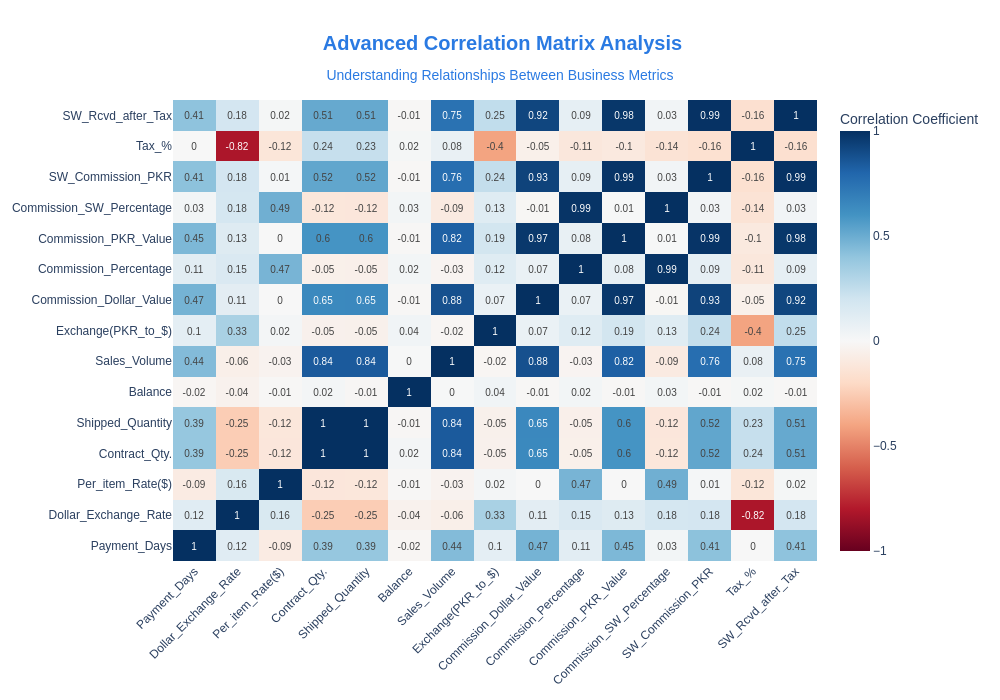

## Executive Summary & Strategic Recommendations

### What We Learned from the Dashboard

Looking at this data, we found some important points that can help guide smart decisions and make daily work smoother.

In [14]:
def generate_strategic_recommendations():
    """Generate actionable business recommendations based on the analysis"""
    
    recommendations_html = f"""
    <div style="margin: 30px 0; padding: 30px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); 
                color: white; border-radius: 20px; box-shadow: 0 15px 35px rgba(0,0,0,0.1);">
        <h2 style="text-align: center; margin-bottom: 30px; font-size: 28px;">
             Strategic Action Plan for Business Growth
        </h2>
        
        <div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(300px, 1fr)); gap: 25px; margin-top: 30px;">
            
            <!-- Revenue Optimization -->
            <div style="background: rgba(255,255,255,0.15); padding: 25px; border-radius: 15px; 
                        backdrop-filter: blur(10px); border: 1px solid rgba(255,255,255,0.2);">
                <h3 style="margin-top: 0; color: #fbbf24;"> Revenue Optimization</h3>
                <ul style="line-height: 1.8; padding-left: 20px;">
                    <li><strong>Focus on Top Performers:</strong> Samad Rubber is the top supplier - strengthen this partnership</li>
                    <li><strong>Customer Expansion:</strong> Takko is the leading customer - explore additional service offerings</li>
                    <li><strong>Commission Review:</strong> 4.35% average rate - benchmark against industry standards</li>
                    <li><strong>Contract Value:</strong> Target contracts above $42,712 average for better margins</li>
                </ul>
            </div>
            
            <!-- Operational Efficiency -->
            <div style="background: rgba(255,255,255,0.15); padding: 25px; border-radius: 15px; 
                        backdrop-filter: blur(10px); border: 1px solid rgba(255,255,255,0.2);">
                <h3 style="margin-top: 0; color: #34d399;"> Operational Efficiency</h3>
                <ul style="line-height: 1.8; padding-left: 20px;">
                    <li><strong>Payment Cycle:</strong> 64.9 days average - implement faster payment processes</li>
                    <li><strong>Supplier Network:</strong> 104 suppliers - optimize for quality over quantity</li>
                    <li><strong>Process Automation:</strong> Streamline recurring contract management</li>
                </ul>
            </div>
            
            <!-- Risk Management -->
            <div style="background: rgba(255,255,255,0.15); padding: 25px; border-radius: 15px; 
                        backdrop-filter: blur(10px); border: 1px solid rgba(255,255,255,0.2);">
                <h3 style="margin-top: 0; color: #f87171;"> Risk Management</h3>
                <ul style="line-height: 1.8; padding-left: 20px;">
                    <li><strong>Customer Concentration:</strong> Diversify beyond top 5 customers (reduce dependency)</li>
                    <li><strong>Currency Risk:</strong> Monitor PKR/USD exchange rate fluctuations</li>
                    <li><strong>Supplier Risk:</strong> Develop backup suppliers for critical materials</li>
                    <li><strong>Contract Monitoring:</strong> Track correlation patterns for early warnings</li>
                </ul>
            </div>
            
            <!-- Growth Opportunities -->
            <div style="background: rgba(255,255,255,0.15); padding: 25px; border-radius: 15px; 
                        backdrop-filter: blur(10px); border: 1px solid rgba(255,255,255,0.2);">
                <h3 style="margin-top: 0; color: #a78bfa;"> Growth Opportunities</h3>
                <ul style="line-height: 1.8; padding-left: 20px;">
                    <li><strong>Market Expansion:</strong> Target new customers similar to Takko profile</li>
                    <li><strong>Product Diversification:</strong> TKMEN, TKLAD, TKKID are top styles - expand variants</li>
                    <li><strong>Digital Transformation:</strong> Implement advanced analytics for predictive insights</li>
                    <li><strong>Partnership Development:</strong> Create strategic alliances with top suppliers</li>
                </ul>
            </div>
            
        </div>
        
        <div style="margin-top: 30px; padding: 25px; background: rgba(255,255,255,0.1); 
                    border-radius: 15px; text-align: center;">
            <h3 style="margin-top: 0; color: #fbbf24;"> Next Steps</h3>
            <p style="font-size: 16px; line-height: 1.6; margin-bottom: 0;">
                <strong>Immediate Actions (30 days):</strong> Implement payment cycle improvements and strengthen top partnerships<br>
                <strong>Short-term Goals (90 days):</strong> Diversify customer base and optimize supplier network<br>
                <strong>Long-term Vision (1 year):</strong> Achieve 20% revenue growth through strategic initiatives
            </p>
        </div>
        
    </div>
    
    <div style="margin: 20px 0; padding: 20px; background: linear-gradient(135deg, #fef3c7 0%, #fde68a 100%); 
                border-radius: 15px; border-left: 5px solid #f59e0b;">
        <h3 style="color: #92400e; margin-top: 0; text-align: center;">
             Dashboard Performance Summary
        </h3>
        <div style="text-align: center; color: #451a03;">
            <p style="font-size: 18px; margin: 10px 0;">
                <strong>Total Business Volume:</strong> ${business_kpis['total_revenue_usd']:,.0f} USD | 
                ₨{business_kpis['total_revenue_pkr']:,.0f} PKR
            </p>
            <p style="font-size: 16px; margin: 10px 0;">
                <strong>Network Scale:</strong> {business_kpis['unique_suppliers']} Suppliers × {business_kpis['unique_customers']} Customers 
            </p>
            <p style="font-size: 16px; margin: 10px 0;">
                <strong>Operational Metrics:</strong> {business_kpis['avg_commission_rate']:.1f}% Commission Rate | 
                {business_kpis['avg_payment_days']:.0f} Days Payment Cycle
            </p>
        </div>
    </div>
    """
    
    return recommendations_html

# Generate and display strategic recommendations
strategic_recommendations = generate_strategic_recommendations()
display(HTML(strategic_recommendations))

print("Advanced Professional Dashboard Analysis Complete!")
print("="*60)
print("Comprehensive KPI Analysis")
print("Interactive Multi-Panel Dashboard") 
print("Professional Business Insights")
print("Advanced Correlation Analysis")
print("Strategic Recommendations")
print("="*60)
print("Ready for executive presentation and strategic decision-making!")

Advanced Professional Dashboard Analysis Complete!
Comprehensive KPI Analysis
Interactive Multi-Panel Dashboard
Professional Business Insights
Advanced Correlation Analysis
Strategic Recommendations
Ready for executive presentation and strategic decision-making!


### _Here’s a quick wrap-up of our main findings from the dashboard. We’ve highlighted the most important insights and shared clear recommendations for the business. Next, we’ll look at how the model performs and suggest practical steps based on what we’ve learned.[03_Model_Performance](https://github.com/MOHSIN184/Textile_Data_Analysis/blob/main/03.%20Model_Evaluation.ipynb)_

___